In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    orig_df = pd.read_csv("BRFSS_2020_DATA.csv", low_memory=False)
except:
    orig_df = pd.read_csv("../BRFSS_2020_DATA.csv", low_memory=False)

# Cleaning:

#### To preserve most of the rows, we'll remove all columns with threshhold(must have at least 300k not nulls): 

In [3]:
clean_df_1 = orig_df.dropna(axis=1, thresh=300000)
clean_df_1.shape

(401958, 112)

#### Remove rows with nulls:

In [4]:
clean_df_1 = clean_df_1.dropna()
clean_df_1.shape

(326959, 112)

# EDA

In [5]:
corr__ = clean_df_1.corr()
corr__['(EVER TOLD) YOU HAD DIABETES'].abs().sort_values(ascending=False).head(50)

(EVER TOLD) YOU HAD DIABETES                                                                             1.000000
GENERAL HEALTH                                                                                           0.243403
IMPUTED AGE IN SIX GROUPS                                                                                0.185661
COMPUTED BODY MASS INDEX                                                                                 0.185643
IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                     0.184805
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                             0.179350
COMPUTED BODY MASS INDEX CATEGORIES                                                                      0.167855
RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)    0.167778
EMPLOYMENT STATUS                                                                       

# HEATMAP

In [6]:
# del hm_df

In [7]:
correlations = corr__['(EVER TOLD) YOU HAD DIABETES'].abs()
correlations = correlations[correlations>0.1].index.to_list()

In [8]:
hm_df = clean_df_1[correlations]

In [9]:
# Dataset for heatmap; exclude age group 14='No response'
hm_df = hm_df.query('`REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` < 14').sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
hm_df.shape

(323558, 25)

In [10]:
hm_df.columns.to_list()

['GENERAL HEALTH',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD DIABETES',
 'NUMBER OF PERMANENT TEETH REMOVED',
 'EMPLOYMENT STATUS',
 'DIFFICULTY WALKING OR CLIMBING STAIRS',
 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
 'PNEUMONIA SHOT EVER',
 'ADULTS WITH GOOD OR BETTER HEALTH',
 'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE',
 'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
 'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)',
 'RESPONDENTS DIAGNOSED WITH ARTHRITIS',
 'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE',
 'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
 'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
 'IMPUTED AGE IN SIX GROUPS',
 'COMPUTED WEIGHT IN KILOGRAMS',
 'COMPUTED BODY MASS INDEX',
 'COMPUTED BODY MASS INDEX CATEGORIES',
 'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
 'DRINKING AN

In [11]:
# rename long column names
# -------------------------
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
hm_df.rename(columns={'EVER DIAGNOSED WITH HEART ATTACK': 'DIAGNOSED WITH HEART ATTACK'
                      ,'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE': 'DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE'
                      ,'EVER DIAGNOSED WITH A STROKE': 'DIAGNOSED WITH A STROKE'
                      ,'(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?' : '(TOLD) YOU HAD COPD, EMPHYSEMA OR CHRONIC BRONCHITIS?'
                      ,'(EVER TOLD) YOU HAD DIABETES' : '(TOLD) YOU HAD DIABETES'
                      ,'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE' : 'LEISURE TIME PHYSICAL ACTIVITY'
                      ,'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)' : 'REPORTED CHD OR MI'
                      ,'RESPONDENTS DIAGNOSED WITH ARTHRITIS' : 'DIAGNOSED WITH ARTHRITIS'
                      ,'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE' : 'AGE IN FIVE-YEAR AGE'
                      ,'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE' : 'AGE IN TWO AGE GROUPS'}
                      , inplace=True)

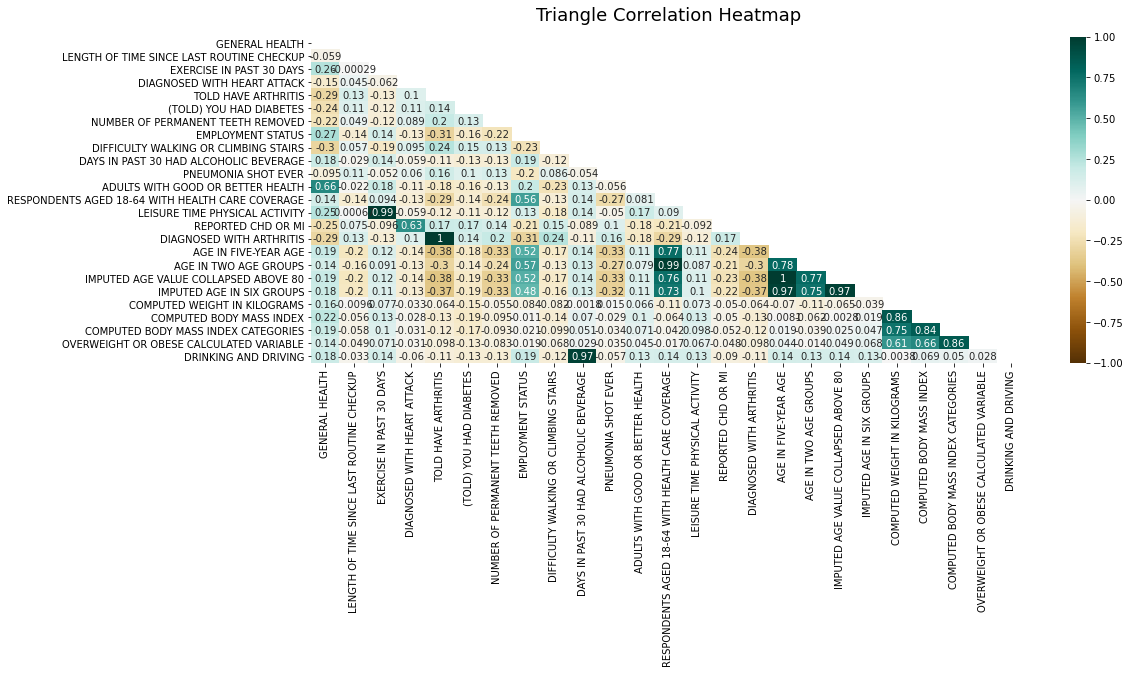

In [13]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(hm_df.corr(), dtype=bool))
heatmap = sns.heatmap(hm_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# PIE CHART

In [14]:
# Dataset for heatmap; exclude age group 14='No response'
pie_df = clean_df_1.query('`REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` < 14').sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
pie_df = clean_df_1['SEX OF RESPONDENT']
pie_df.shape

(326959,)

In [15]:
pie_df.value_counts()

2    171733
1    155226
Name: SEX OF RESPONDENT, dtype: int64

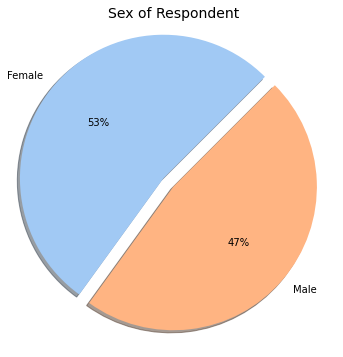

In [16]:
#define data labels
labels = ['Female', 'Male']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10, 6))
plt.pie(pie_df.value_counts(), labels = labels, colors = colors, autopct='%.0f%%' ,radius=1.1 ,shadow=True, explode=[0.1,0], startangle=45)
plt.title("Sex of Respondent", fontdict={'fontsize':14})
plt.show()